In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [557]:
df= pd.read_csv("^NSEI.csv")

In [558]:
df.tail()

Date         Open         High          Low        Close  \
3066  20-02-2020  12119.00000  12152.00000  12071.45020  12080.84961   
3067  24-02-2020  12012.54981  12012.54981  11813.40039  11829.40039   
3068  25-02-2020  11877.50000  11883.04981  11779.90039  11797.90039   
3069  26-02-2020  11738.54981  11783.25000  11639.59961  11678.50000   
3070  27-02-2020  11661.25000  11663.85000  11536.70000  11633.30000   

        Adj Close    Volume  
3066  12080.84961  502600.0  
3067  11829.40039  490800.0  
3068  11797.90039  461000.0  
3069  11678.50000  567600.0  
3070  11633.30000  608600.0

In [559]:
df.shape

(3071, 7)

In [560]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [561]:
df.tail()

index        Date         Open         High          Low        Close  \
3034   3066  20-02-2020  12119.00000  12152.00000  12071.45020  12080.84961   
3035   3067  24-02-2020  12012.54981  12012.54981  11813.40039  11829.40039   
3036   3068  25-02-2020  11877.50000  11883.04981  11779.90039  11797.90039   
3037   3069  26-02-2020  11738.54981  11783.25000  11639.59961  11678.50000   
3038   3070  27-02-2020  11661.25000  11663.85000  11536.70000  11633.30000   

        Adj Close    Volume  
3034  12080.84961  502600.0  
3035  11829.40039  490800.0  
3036  11797.90039  461000.0  
3037  11678.50000  567600.0  
3038  11633.30000  608600.0

In [562]:
def ComputeEWMA(data, alpha=0.6):
    """Computes Exponentially Weighted Moving Average
    """
    EWMA = [0]*len(data)
    EWMA[0] = data[0]
    for i in range(1,len(data)):
        EWMA[i] = alpha*data[i] + (1-alpha)*EWMA[i-1]
    return EWMA

In [563]:
def ComputeOBV(close,volume):
    """Computes On Balance Volume"""
    OBV = [0]*len(close)
    OBV[0] = volume[0]
    for i in range(1,len(close)):
        if (close[i] > close[i-1]):
            OBV[i] = OBV[i-1] + volume[i]
        elif (close[i] < close[i-1]):
            OBV[i] = OBV[i-1] - volume[i]
        elif (close[i] == close[i-1]):
            OBV[i] = OBV[i-1]
    return OBV

In [564]:
def ComputeRSI(close):
    """Computes RSI Indicator"""
    
    U = [0]*len(close)
    D = [0]*len(close)    
    U_mean = [0]*len(close)
    D_mean = [0]*len(close)
    U_mean2 = [0]*len(close)
    D_mean2 = [0]*len(close)
    RS = [0]*len(close)
    RSI = [0]*len(close)
    
    for i in range(1,len(close)):
        if(close[i] > close[i-1]):
            U[i] = (close[i]-close[i-1])
        elif(close[i] < close[i-1]):
            D[i] = (close[i-1]-close[i])
    
    #U = [0]*len(close)       
    #U[1:len(close)] = [(close[i]-close[i-1]) for i in range(1,len(close)) if(close[i] > close[i-1])]
    #D = [(close[i-1]-close[i]) for i in range(1,len(close)) if(close[i] < close[i-1])]
    #print(len(U))
    #print(len(D)) 
    
    U_mean = pd.Series(U).rolling(14).mean()
    D_mean = pd.Series(D).rolling(14).mean()
    
    U_mean2[1:len(close)] = [(U_mean[i-1]*13 + U_mean[i])/14 for i in range(1,len(close))]
    D_mean2[1:len(close)] = [(D_mean[i-1]*13 + D_mean[i])/14 for i in range(1,len(close))]
    
    RS[1:len(close)] = [U_mean2[i]/D_mean2[i] for i in range(1,len(close))]
    RSI = [100 - (100/(1+RS[i])) for i in range(0,len(close))]
    
    return RSI

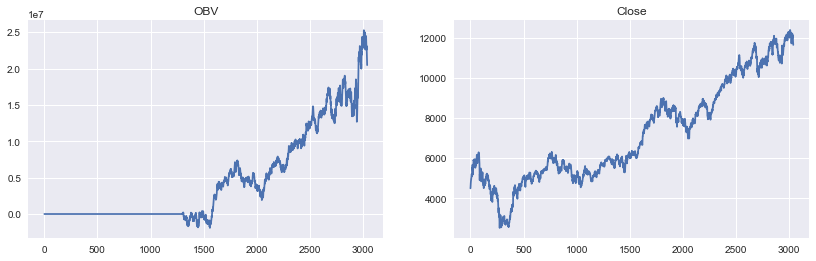

In [565]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,4))

ax[0].plot(ComputeOBV(df['Close'],df['Volume']))
ax[0].set_title('OBV')

ax[1].plot(df['Close'])
ax[1].set_title('Close')

In [566]:
df.drop(['Adj Close'],axis=1,inplace=True)
df['EWMA']=ComputeEWMA(df['Close'],0.6)
df['MA3'] = df['Close'].rolling(3).mean()
df['OBV'] = ComputeOBV(df['Close'],df['Volume'])
df['Return'] = df['Close']/df['Close'].shift(1)-1
df['EWMARet'] = df['EWMA']/df['EWMA'].shift(1)-1
df['MA3Ret'] = df['MA3']/df['MA3'].shift(1)-1
df['RSI'] = ComputeRSI(df['Close'])

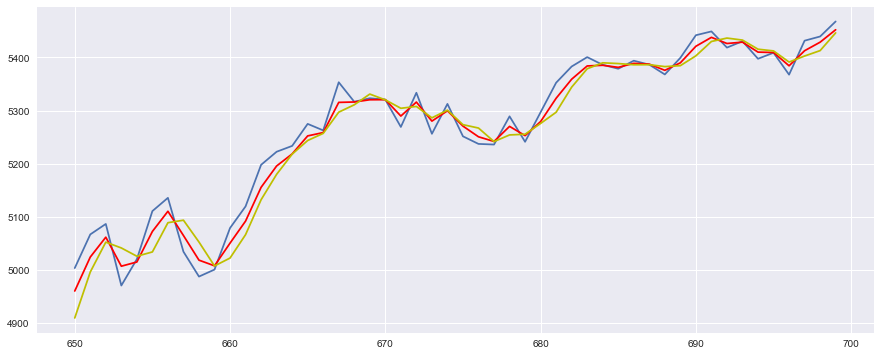

In [567]:
fig = plt.figure(figsize=(15,6))
plt.plot(df['Close'][650:700])
plt.plot(df['EWMA'][650:700],'r')
plt.plot(df['MA3'][650:700],'y')

In [568]:
df.head()

index        Date         Open         High          Low        Close  \
0      0  17-09-2007  4518.450195  4549.049805  4482.850098  4494.649902   
1      1  18-09-2007  4494.100098  4551.799805  4481.549805  4546.200195   
2      2  19-09-2007  4550.250000  4739.000000  4550.250000  4732.350098   
3      3  20-09-2007  4734.850098  4760.850098  4721.149902  4747.549805   
4      4  21-09-2007  4752.950195  4855.700195  4733.700195  4837.549805   

   Volume         EWMA          MA3  OBV    Return   EWMARet    MA3Ret  RSI  
0     0.0  4494.649902          NaN  0.0       NaN       NaN       NaN  0.0  
1     0.0  4525.580078          NaN  0.0  0.011469  0.006882       NaN  NaN  
2     0.0  4649.642090  4591.066732  0.0  0.040946  0.027414       NaN  NaN  
3     0.0  4708.386719  4675.366699  0.0  0.003212  0.012634  0.018362  NaN  
4     0.0  4785.884571  4772.483236  0.0  0.018957  0.016460  0.020772  NaN

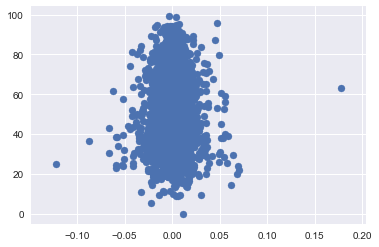

In [569]:
plt.scatter(df['Return'],df['RSI'].shift(1))

In [570]:
data = df[['Date','Close','Return','EWMA','EWMARet','Volume','OBV','RSI']]
data.tail()

Date        Close    Return          EWMA   EWMARet    Volume  \
3034  20-02-2020  12080.84961 -0.003715  12083.218168 -0.000294  502600.0   
3035  24-02-2020  11829.40039 -0.020814  11930.927501 -0.012603  490800.0   
3036  25-02-2020  11797.90039 -0.002663  11851.111235 -0.006690  461000.0   
3037  26-02-2020  11678.50000 -0.010120  11747.544494 -0.008739  567600.0   
3038  27-02-2020  11633.30000 -0.003870  11678.997798 -0.005835  608600.0   

             OBV        RSI  
3034  22596200.0  53.352862  
3035  22105400.0  54.414074  
3036  21644400.0  53.760028  
3037  21076800.0  41.038290  
3038  20468200.0  31.270558

In [571]:
data.head()

Date        Close    Return         EWMA   EWMARet  Volume  OBV  RSI
0  17-09-2007  4494.649902       NaN  4494.649902       NaN     0.0  0.0  0.0
1  18-09-2007  4546.200195  0.011469  4525.580078  0.006882     0.0  0.0  NaN
2  19-09-2007  4732.350098  0.040946  4649.642090  0.027414     0.0  0.0  NaN
3  20-09-2007  4747.549805  0.003212  4708.386719  0.012634     0.0  0.0  NaN
4  21-09-2007  4837.549805  0.018957  4785.884571  0.016460     0.0  0.0  NaN

In [572]:
# Shift the independent vars by +1
# Remove NaN
# Look at linear relationship between dependent and independent
# Check correlation between independent vars
# Scale X so that all vars have same distribution
# Split data in training, CV and test set
# Perform linear reg on training set. Check in CV set

In [573]:
# Shift the independent vars by +1
data.loc[:,['EWMARet','Volume','RSI']]=data.loc[:,['EWMARet','Volume','RSI']].shift(1)

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [574]:
data.head()

Date        Close    Return         EWMA   EWMARet  Volume  OBV  RSI
0  17-09-2007  4494.649902       NaN  4494.649902       NaN     NaN  0.0  NaN
1  18-09-2007  4546.200195  0.011469  4525.580078       NaN     0.0  0.0  0.0
2  19-09-2007  4732.350098  0.040946  4649.642090  0.006882     0.0  0.0  NaN
3  20-09-2007  4747.549805  0.003212  4708.386719  0.027414     0.0  0.0  NaN
4  21-09-2007  4837.549805  0.018957  4785.884571  0.012634     0.0  0.0  NaN

In [575]:
# Remove NaN
data.dropna(inplace=True)
data.reset_index(inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [576]:
data.head()

index        Date        Close    Return         EWMA   EWMARet  Volume  \
0     15  09-10-2007  5327.250000  0.047619  5246.296054 -0.011505     0.0   
1     16  10-10-2007  5441.450195  0.021437  5363.388539  0.023694     0.0   
2     17  11-10-2007  5524.850098  0.015327  5460.265474  0.022319     0.0   
3     18  12-10-2007  5428.250000 -0.017485  5441.056190  0.018063     0.0   
4     19  15-10-2007  5670.399902  0.044609  5578.662417 -0.003518     0.0   

   OBV        RSI  
0  0.0  95.704089  
1  0.0  85.306252  
2  0.0  87.764189  
3  0.0  86.979129  
4  0.0  87.115873

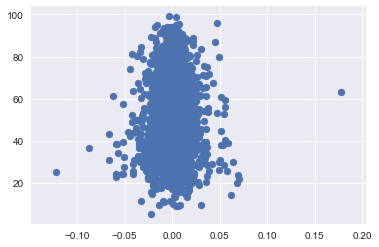

In [577]:
# Look at linear relationship between dependent and independent
plt.scatter(data['Return'],data['RSI'])  

In [578]:
data[data['Volume']>0].index

Int64Index([1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296,
            ...
            3013, 3014, 3015, 3016, 3018, 3019, 3020, 3021, 3022, 3023],
           dtype='int64', length=1722)

In [579]:
# Check correlation between independent vars
data.loc[1300:,['EWMARet','Volume','RSI']].corr()  

EWMARet    Volume       RSI
EWMARet  1.000000  0.006359  0.160859
Volume   0.006359  1.000000 -0.014033
RSI      0.160859 -0.014033  1.000000

In [580]:
temp=data[data['Date']=="02-01-2019"].index.values[0]
print(temp)

2742


In [581]:
data.loc[2740:2750]

index        Date        Close    Return          EWMA   EWMARet  \
2740   2755  28-12-2018  10859.90039  0.007431  10819.889074  0.002786   
2741   2756  31-12-2018  10862.54981  0.000244  10845.485516  0.005578   
2742   2757  02-01-2019  10792.50000 -0.006449  10813.694206  0.002366   
2743   2758  03-01-2019  10672.25000 -0.011142  10728.827682 -0.002931   
2744   2759  04-01-2019  10727.34961  0.005163  10727.940839 -0.007848   
2745   2760  07-01-2019  10771.79981  0.004144  10754.256222 -0.000083   
2746   2761  08-01-2019  10802.15039  0.002818  10782.992723  0.002453   
2747   2762  09-01-2019  10855.15039  0.004906  10826.287323  0.002672   
2748   2763  10-01-2019  10821.59961 -0.003091  10823.474695  0.004015   
2749   2764  11-01-2019  10794.95020 -0.002463  10806.359998 -0.000260   
2750   2765  14-01-2019  10737.59961 -0.005313  10765.103765 -0.001581   

        Volume         OBV        RSI  
2740  456100.0  15895600.0  48.616488  
2741  245500.0  16076500.0  57.432317  
2742  180900.0  15766800.0  57.738321  
2743  309700.0  15480600.0  68.565378  
2744  286200.0  15777200.0  61.220073  
2745  296600.0  16046600.0  46.464120  
2746  269400.0  16324300.0  46.651947  
2747  277700.0  16657300.0  48.033022  
2748  333000.0  16402900.0  45.363035  
2749  254400.0  16142100.0  46.777010  
2750  260800.0  15843300.0  41.954575

In [615]:
# Split data in training, CV and test set
#X = data[['EWMARet','Volume','RSI']][1290:]    # taking from point where volume data is present
#Y = data['Return'][1290:]

X = data[['RSI']]  
Y = data['Return']

X_test = X.loc[temp:]
Y_test = Y.loc[temp:]

from sklearn.model_selection import train_test_split
X_train, X_CV, Y_train, Y_CV = train_test_split(X.loc[:temp], Y.loc[:temp], test_size=0.30, random_state=10)

In [616]:
# Perform linear reg on training set. Check in CV set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

Y_predict_CV = reg.predict(X_CV)

In [617]:
# Compute RMSE on CV set (on returns)
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_CV, Y_predict_CV))
# 0.013534184078869043

0.013534184078869043

In [618]:
# Compute RMSE on test set (on returns)
Y_predict_test = reg.predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_predict_test))
# 0.008806577493737172

0.008806577493737172

In [619]:
# Computing price from predicted returns

InitPrice = data.loc[2741,'Close']
computedClose = [0]*(len(Y_predict_test))
for i in range(0,len(Y_predict_test)):
    if(i==0):
        computedClose[i] = InitPrice*(1+Y_predict_test[i])
    else:
        computedClose[i] = computedClose[i-1]*(1+Y_predict_test[i])

In [620]:
# RMSE of prices
np.sqrt(mean_squared_error(data.loc[temp:,'Close'], computedClose))
# 403.7737460030161

403.7737460030161

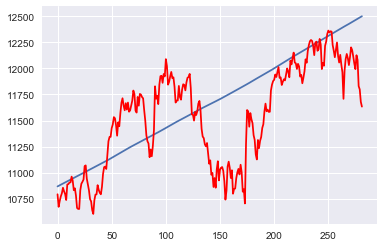

In [621]:
plt.plot(computedClose)
original = data.loc[temp:,'Close']
plt.plot(data.loc[temp:,'Close'].values,'r')